# APODE

Este documento muestra la funcionalidad actual del paquete apode. El mismoe dispone de varios métodos que calculan medidas y generan gráficos en los siguientes temas:

* Pobreza
* Desigualdad
* Bienestar
* Polarización
* Concentración

Otros temas serán agregados más adelante.

Al momento los algoritmos no han sido testeados y es escasa la documentación. 

# Clase ApodeData

Los objetos se crean mediante:

    df = ApodeData(DataFrame,varx)
    
En donde varx es el nombre de una columna del dataframe.

Metodos que calculan indicadores:
   
    df.poverty(method,*args)    
    df.ineq(method,*args)
    df.welfare(method,*args) 
    df.polar(method,*args)
    df.conc(method,*args)
 
Métodos que computan gráficos:

    df.tip(*args,**kwargs)
    df.lorenz(*args,**kwargs)
    df.pen(*args,**kwargs)
    
    

# Data Creation and Description

* Los datos pueden generarse manualmente o mediante simuación. Estan contenidos en un DataFrame
* Pueden existir otras variables categóricas que permiten aplicar los indicadores por grupos (groupby)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
import sys
sys.path.append("D:/GitHub/apode/")  # ver

from apode import ApodeData
from apode.datasets import * #distribution_examples #,default_rng # test  

## Carga manual

Se puede crear objeto desde un DataFrame o desde un argumento válido de la funcion DataFrame. La función *binning* se puede usar para agrupar datos.

In [3]:
x = [23, 10, 12, 21, 4, 8, 19, 15, 11, 9]
df1 = pd.DataFrame({'x':x})
dr1 = ApodeData(df1, varx="x") 

dr1

,x
0,23
1,10
2,12
3,21
4,4
5,8
6,19
7,15
8,11
9,9


## Lectura desde la web

Usar LIS Database https://www.lisdatacenter.org/our-data/lis-database/

The Luxembourg Income Study Database (LIS) is the largest available income database of harmonised microdata collected from about 50 countries in Europe, North America, Latin America, Africa, Asia, and Australasia spanning five decades.


## Simulación 

La función *distribution_examples* brinda algunos ejemplos de distribuciones usuales para modelar la distribución del ingreso.

In [5]:
# Generar datos
# list1 = ['uniform','lognormal','exponential','pareto','chisquare','gamma','weibull']
# list2 = ['constant',linear','squared','extreme','unimodal','bimodal']

n = 1000 # observaciones
seed = 12345
dr2 = make_weibull(seed=seed,size=n)
dr2.describe()

,x
count,1000.000000
mean,45.408376
std,30.207372
min,0.112876
25%,22.363891
50%,39.404779
75%,62.690946
max,190.596705


In [ ]:
# Graficar distribución
#sns.distplot(df2).set_title(fdistr)
#plt.show()

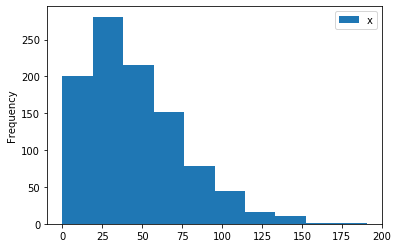

In [16]:
dr2.data.plot(kind="hist")
plt.show()

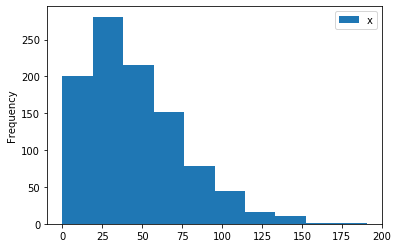

In [6]:
dr2.plot()

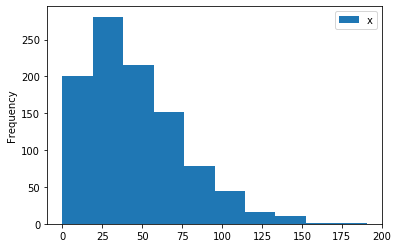

In [7]:
dr2.plot.hist()

# Measures

## Poverty

Están implementados diversas medidas de pobreza y la curva TIP (permite comparar gráficamente la pobreza entre distribuciones).

Todos los métodos requieren la linea de pobreza (pline) y algunos métodos requieren un parámetro adicional (alpha). En algunos casos se aplica un valor por defecto.

### Numerical measures

In [8]:
pline = 50 # Poverty line
p = dr2.poverty('headcount',pline=pline)
p

0.626

In [9]:
# Evaluar un listado de métodos
lista = [["headcount", None],
         ["gap", None],
         ["severity",None],
         ["fgt",1.5],
         ["sen",None],
         ["sst",None],
         ["watts",None],
         ["cuh",0],
         ["cuh",0.5],
         ["takayama",None],
         ["kakwani",None],
         ["thon",None],
         ["bd",1.0],
         ["bd",2.0],
         ["hagenaars",None],
         ["chakravarty",0.5]]
p = []
for elem in lista:
    if elem[1]==None:
        p.append(dr2.poverty(elem[0],pline=pline))
    else:
        p.append(dr2.poverty(elem[0],pline=pline,alpha=elem[1]))
        df_p = pd.concat([pd.DataFrame(lista),pd.DataFrame(p)],axis=1)
df_p.columns = ['method','alpha','measure']
df_p   

,method,alpha,measure
0,headcount,NaN,0.626000
1,gap,NaN,0.295057
2,severity,NaN,0.182768
3,fgt,1.5,0.227611
4,sen,NaN,0.415923
5,sst,NaN,0.252163
6,watts,NaN,0.525879
7,cuh,0.0,0.413033
8,cuh,0.5,0.342701
9,takayama,NaN,0.239190


### Graph measures

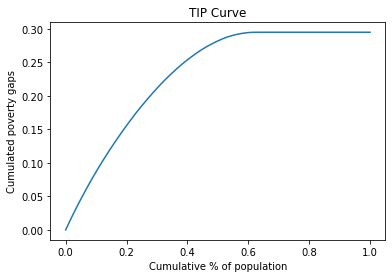

In [11]:
# Curva TIP
# dr2.poverty("tip",pline=pline,plot=True)
#df_tip = dr2.poverty("tip",pline=pline)
dr2.plot("tip",pline=pline)

## Inequality

Están implementadas 12 medidas de desigualdad y la Curva de Lorenz relativa, gemeralizada y absoluta (permite comparar gráficamente la desigualdad entre distribuciones)

### Numerical measures

In [8]:
# Evaluar un método 
q = dr2.inequality('gini')
q

0.3652184907296819

In [9]:
# Evaluar un listado de métodos
lista = [["rrange", None],
         ["rad", None],
         ["cv",None],
         ["sdlog",None],
         ["gini",None],
         ["merhan",None],
         ["piesch",None],
         ["bonferroni",None],
         ["kolm",0.5],
         ["ratio",0.05],
         ["ratio",0.2],
         ["entropy",0],
         ["entropy",1],
         ["entropy",2],         
         ["atkinson",0.5],
         ["atkinson",1.0],
         ["atkinson",2.0]]
p = []
for elem in lista:
    if elem[1]==None:
        p.append(dr2.inequality(elem[0]))
    else:
        p.append(dr2.inequality(elem[0],alpha=elem[1]))

df_i = pd.concat([pd.DataFrame(lista),pd.DataFrame(p)],axis=1)
df_i.columns = ['method','alpha','measure']
df_i   

,method,alpha,measure
0,rrange,NaN,4.194905
1,rad,NaN,0.264575
2,cv,NaN,0.664905
3,sdlog,NaN,0.916263
4,gini,NaN,0.365218
5,merhan,NaN,0.512500
6,piesch,NaN,0.288587
7,bonferroni,NaN,0.510418
8,kolm,0.50,36.566749
9,ratio,0.05,0.032061


### Graph measures

Un argumento es plot (valor true por defecto).

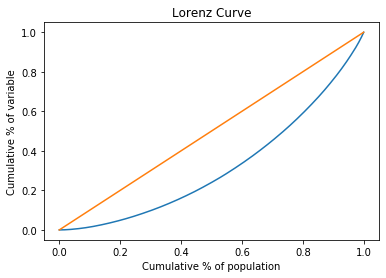

In [12]:
# Curva de Lorenz
#df_lor = dr2.inequality('lorenz')
dr2.plot.lorenz()

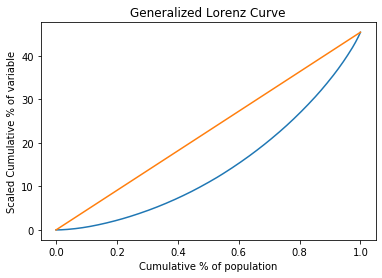

In [13]:
# Curva de Lorenz Generalizada
#df_lorg = dr2.inequality('lorenz',alpha='g')
dr2.plot.lorenz(alpha='g')

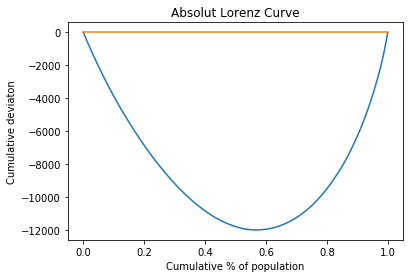

In [14]:
# Curva de Lorenz Absoluta
#df_lora = dr2.inequality('lorenz',alpha='a')
dr2.plot.lorenz(alpha='a')

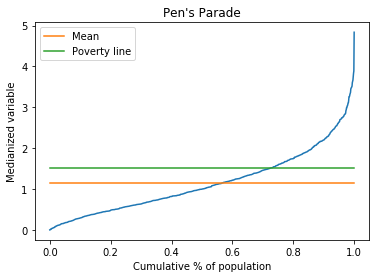

In [15]:
# Pen's Parade
#df_pen = dr2.inequality('pen',pline=60)
dr2.plot('pen',pline=60)

## Welfare

Están implementadas 5 funciones de bienestar social.

In [18]:
# Evaluar un método 
w = dr2.welfare('sen')
w

43.83069516538674

In [19]:
# Evaluar un listado de métodos
lista = [["utilitarian", None],
         ["rawlsian", None],
         ["sen",None],
         ["theill",None],
         ["theilt",None],
         ["isoelastic",0],
         ["isoelastic",1],
         ["isoelastic",2],
         ["isoelastic",np.Inf]]
p = []
for elem in lista:
    if elem[1]==None:
        p.append(dr2.welfare(elem[0]))
    else:
        p.append(dr2.welfare(elem[0],alpha=elem[1]))

df_w = pd.concat([pd.DataFrame(lista),pd.DataFrame(p)],axis=1)
df_w.columns = ['method','alpha','measure']
df_w   

,method,alpha,measure
0,utilitarian,NaN,43.165526
1,rawlsian,NaN,0.308786
2,sen,NaN,43.830695
3,theill,NaN,32.835971
4,theilt,NaN,34.769813
5,isoelastic,0.0,43.165526
6,isoelastic,1.0,3.491525
7,isoelastic,2.0,-0.053750
8,isoelastic,inf,0.308786


## Polarization 

Están implementados 2 medidas de polarización.

In [20]:
# Evaluar un método 
p = dr2.polarization('ray')
p

0.03146185773732036

In [21]:
# Evaluar un listado de métodos
lista = [["ray", None],
         ["wolfson", None]]
p = []
for elem in lista:
    if elem[1]==None:
        p.append(dr2.polarization(elem[0]))
    else:
        p.append(dr2.polarization(elem[0],alpha=elem[1]))
df_pz = pd.concat([pd.DataFrame(lista),pd.DataFrame(p)],axis=1)
df_pz.columns = ['method','alpha','measure']
df_pz 

,method,alpha,measure
0,ray,None,0.031462
1,wolfson,None,0.351678


## Concentration

Están implementadas 4 medidas de concentración (de uso comun para analizar la concentración industrial).

In [22]:
# Evaluar un método
c = dr2.concentration('herfindahl')
c

0.00044526570696696563

In [23]:
# Evaluar un listado de métodos
lista = [["herfindahl", None],
         ["herfindahl", True],
         ["rosenbluth",None],
         ["concentration_ratio",1],
         ["concentration_ratio",5]]
p = []
for elem in lista:
    if elem[1]==None:
        p.append(dr2.concentration(elem[0]))
    else:
        if elem[0]=="herfindahl":
            p.append(dr2.concentration(elem[0],normalized=elem[1]))  # ver keyword
        elif elem[0]=="concentration_ratio":
            p.append(dr2.concentration(elem[0],k=elem[1]))  # ver keyword            
        else:
            p.append(dr2.concentration(elem[0],alpha=elem[1]))

df_c = pd.concat([pd.DataFrame(lista),pd.DataFrame(p)],axis=1)
df_c.columns = ['method','alpha','measure']
df_c 

,method,alpha,measure
0,herfindahl,None,0.000445
1,herfindahl,True,0.000445
2,rosenbluth,None,0.001573
3,concentration_ratio,1,0.004162
4,concentration_ratio,5,0.017772


# Tools

## Decomposition

Los medidas pueden aplicarse por subrgrupos de acuerdo a cierta categoría. Por ejemplo:

In [24]:
x = [23, 10, 12, 21, 4, 8, 19, 15, 5, 7]
y = [10,10,20,10,10,20,20,20,10,10] 
w = np.arange(1,11)
dfa = pd.DataFrame({'x':x,'y':y,'w':w})
dfa

,x,y,w
0,23,10,1
1,10,10,2
2,12,20,3
3,21,10,4
4,4,10,5
5,8,20,6
6,19,20,7
7,15,20,8
8,5,10,9
9,7,10,10


In [25]:
# calculo simple
pline = 11
dra1 = ApodeData(dfa,varx='x') 
p1 = dra1.poverty('headcount',pline=pline)
p1

0.5

In [26]:
# ver si vale la pena implementarlo en la clase
# recibe un dataframe y aplica medida de acuerdo a columna "varg"
def poverty_gby(dfa,method,varg,pline):
    grouped = dfa.groupby(varg)
    a = []
    b = []
    c = []
    varx = 'x'
    for name, group in grouped:
        y = group[varx].values
        count = group.shape[0]
        dri = ApodeData({varx:y},varx=varx)
        p = dri.poverty(method,pline=pline)
        a.append(name)
        b.append(p)
        c.append(count)
    xname = varx + "_measure"
    wname =varx + "_weight"
    return pd.DataFrame({xname: b, wname: c}, index=pd.Index(a))    

In [27]:
# calculo por grupos según variable "y"
p2 = poverty_gby(dfa,'headcount',varg='y',pline=pline)
p2

,x_measure,x_weight
10,0.666667,6
20,0.250000,4


In [28]:
# Si el indicador es descomponible se obtiene el mismo resultado:
p2_p = sum(p2['x_measure']*p2['x_weight']/sum(p2['x_weight']))
p2_p

0.5

## Comparative statics

Comparación de las medidas  en dos monetos de tiempo. 

Matrices de transición.

## Estimation

Se puede estimar:

* Intervalos de confianza de los indicadores usando bootstrap 
* Distribuciones paramétricas de los datos (algunas permiten calcular indirectamente las medidas, Pareto y Gini, por ej)

# Todo

**En algoritmos falta (implementación):**

* Tamaño nulo del dataframe
* Division por cero (/log(1))
* overflow
* Tratamiento de missings
* implementación eficiente (algunos son lentos: polarizacion)
* mejorar algunos nombres
* ver si uniformar nombre de parametros
* Hay metodos que tienen varios nombres o que pueden estar en diferentes categorías. Ver si agregar redundancia.


**En test:**

* Comparar resultados con librerias de R (y Stata)

# Other packages

Paquetes relacionados.

**Python**

- http://www.poorcity.richcity.org/oei/  (algoritmos)
- https://github.com/mmngreco/IneqPy
- https://pythonhosted.org/IneqPy/ineqpy.html
- https://github.com/open-risk/concentrationMetrics
- https://github.com/cjohnst5/GBdistributiontree

**R**

- https://cran.r-project.org/web/packages/ineq/ineq.pdf
- https://cran.r-project.org/web/packages/affluenceIndex/affluenceIndex.pdf
- https://cran.r-project.org/web/packages/dineq/dineq.pdf
- https://github.com/PABalland/EconGeo
- https://cran.r-project.org/web/packages/rtip/rtip.pdf
- https://cran.r-project.org/web/packages/GB2/index.html

**Stata**

- https://www.stata.com/manuals/rinequality.pdf
- http://dasp.ecn.ulaval.ca/dmodules/madds20.htm


# References

* Cowell, F. (2011) Measuring Inequality. London School of Economics Perspectives in Economic Analysis. 3rd ed. Edición. Oxford University Press
http://darp.lse.ac.uk/papersDB/Cowell_measuringinequality3.pdf
* Cowell, F. (2016) “Inequality and Poverty Measures”, in Oxford Handbook of Well-Being And Public Policy, edited by Matthew D. Adler and Marc Fleurbaey 
* Haughton, J. and S. Khandker (2009). Handbook on Poverty + Inequality. World Bank Training Series. https://openknowledge.worldbank.org/bitstream/handle/10986/11985/9780821376133.pdf
* POBREZA Y DESIGUALDAD EN AMÉRICA LATINA. https://www.cedlas.econo.unlp.edu.ar/wp/wp-content/uploads/Pobreza_desigualdad_-America_Latina.pdf
* https://www.cepal.org/es/publicaciones/4740-enfoques-la-medicion-la-pobreza-breve-revision-la-literatura
* https://www.cepal.org/es/publicaciones/4788-consideraciones-indice-gini-medir-la-concentracion-ingreso


